# Task 1

In [ ]:
# Какво е класификация?
#Класификацията е метод в машинното самообучение, в което се категоризират данни в групи на база техните характеристики.


# Какво е бинарна класификация?
#Бинарната класификация е вид класификация, при която има само двe възможни изходни групи.


# Коя колона може да бъде целевата променлива за бинарна класификация?
# Колоната "churn" може да бъде целевата променлива за бинарна класификация, тъй като приема стойности 0 и 1, което предполага две възможни състояния.



# Какъв термин се използва за описание на останалите колони?
# Останалите колони се наричат "характеристики" или "фичъри" (features) и служат за предоставяне на информация, използвана за предсказване на целевата променлива.

# Task 2

In [ ]:
# Надявам се правилно да съм разбрал заадчата

from sklearn.module import Model

model = Model()

model.fit(X, y)

predictions = model.predict(X_new)

print(predictions)


# Task 3

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

data_path = '/content/drive/My Drive/ML_24-25/Data/telecom_churn_clean.csv'


data = pd.read_csv(data_path)

X = data[['account_length', 'customer_service_calls']].values
y = data['churn'].values

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

predictions = knn.predict(X_new)
print(f"{predictions=}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
predictions=array([0, 1, 0])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Task 4

# step 1


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



accuracy_n5 = knn.score(X_test, y_test)
print(accuracy_n5)

0.8515742128935532


# step 2

In [16]:
neighbors_range = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracies[k] = knn.score(X_train, y_train) #Това ли се изисква? изглежд ми странно да оценявам training set? Ако 'ДА' е за да видим дали няма overfiting?
    test_accuracies[k] = knn.score(X_test, y_test)

print("Train Accuracies:", train_accuracies)
print("Test Accuracies:", test_accuracies)
# Като изкючим к=1 не виждам значителна разлика между стойностите. Очаква ли се това?

Train Accuracies: {1: 0.846211552888222, 2: 0.873218304576144, 3: 0.8739684921230307, 4: 0.8690922730682671, 5: 0.872093023255814, 6: 0.8653413353338335, 7: 0.8702175543885972, 8: 0.8634658664666166, 9: 0.8660915228807202, 10: 0.8630907726931732, 11: 0.8642160540135033, 12: 0.8630907726931732}
Test Accuracies: {1: 0.7766116941529235, 2: 0.8500749625187406, 3: 0.8425787106446777, 4: 0.8530734632683659, 5: 0.8515742128935532, 6: 0.8545727136431784, 7: 0.8605697151424287, 8: 0.856071964017991, 9: 0.8590704647676162, 10: 0.8545727136431784, 11: 0.8590704647676162, 12: 0.8545727136431784}
0.8545727136431784


# step 3

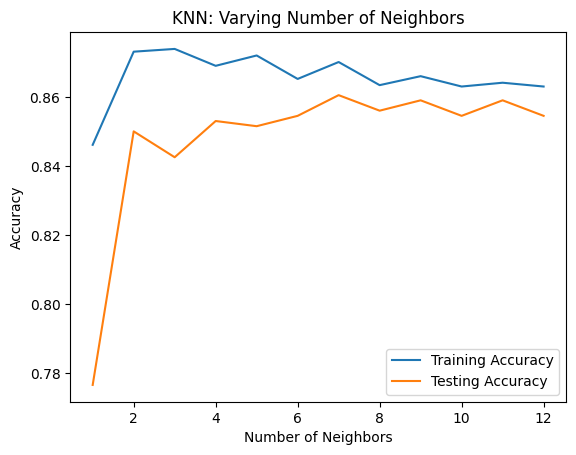

Training Dataset Shape: (2666, 2)
Accuracy when "n_neighbors=5": 0.8515742128935532
neighbors=[ 1  2  3  4  5  6  7  8  9 10 11 12]
train_accuracies={1: 0.8462, 2: 0.8732, 3: 0.874, 4: 0.8691, 5: 0.8721, 6: 0.8653, 7: 0.8702, 8: 0.8635, 9: 0.8661, 10: 0.8631, 11: 0.8642, 12: 0.8631}
test_accuracies={1: 0.7766, 2: 0.8501, 3: 0.8426, 4: 0.8531, 5: 0.8516, 6: 0.8546, 7: 0.8606, 8: 0.8561, 9: 0.8591, 10: 0.8546, 11: 0.8591, 12: 0.8546}


In [33]:
import matplotlib.pyplot as plt

train_accuracies = {k: round(acc, 4) for k, acc in train_accuracies.items()}
test_accuracies = {k: round(acc, 4) for k, acc in test_accuracies.items()}

plt.plot( list(train_accuracies.keys()), list(train_accuracies.values()), label='Training Accuracy')
plt.plot( list(test_accuracies.keys()), list(test_accuracies.values()), label='Testing Accuracy')

plt.title("KNN: Varying Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print(f"Training Dataset Shape: {X_train.shape}") # Колоните при мен са 2 предполагам че при теб е броят на всички колони в csv-то
print(f"Accuracy when \"n_neighbors=5\": {accuracy_n5}")
print(f"neighbors={neighbors_range}")
print(f"train_accuracies={train_accuracies}")
print(f"test_accuracies={test_accuracies}")


# Task 5

KNN class

In [36]:
# Тук използвах помощ от интернет
# https://www.youtube.com/shorts/rdLgKcXW8ys

import numpy as np

class KNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _distance(self, X1, X2):
        return np.sqrt(np.sum((X1 - X2) ** 2, axis=1))

    def predict(self, X):
        predictions = []
        for x in X:
            distances = self._distance(self.X_train, x)

            neighbors_idx = np.argsort(distances)[:self.n_neighbors]
            neighbors_labels = self.y_train[neighbors_idx]

            most_common = np.bincount(neighbors_labels).argmax()
            predictions.append(most_common)

        return np.array(predictions)


    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

In [37]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

data_path = '/content/drive/My Drive/ML_24-25/Data/telecom_churn_clean.csv'
data = pd.read_csv(data_path)

X = data[['account_length', 'customer_service_calls']].values
y = data['churn'].values

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

predictions = knn.predict(X_new)
print(f"{predictions=}")

custom_knn = KNN(n_neighbors=6)
custom_knn.fit(X, y)

custom_predictions = custom_knn.predict(X_new)
print(f"{custom_predictions=}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
predictions=array([0, 1, 0])
custom_predictions=array([0, 1, 0])
